In [1]:
import h5py
import os

print("cwd", os.getcwd())

cwd /Users/haardshah/development/gatech/cvnlp_research/Text-to-Image-Synthesis


In [14]:
import numpy as np

In [29]:
import os
import io
from torch.utils.data import Dataset, DataLoader
import h5py
import numpy as np
import pdb
from PIL import Image
import torch
from torch.autograd import Variable
import pdb
import torch.nn.functional as F

In [4]:
birds_hd5_path = 'Birds dataset/birds.hdf5'
data = h5py.File(birds_hd5_path, mode='r')

In [5]:
data.keys()

<KeysViewHDF5 ['test', 'train', 'valid']>

In [8]:
first_name = [str(k) for k in data['train'].keys()][0]

In [9]:
first_name

'American_Goldfinch_0001_32306_0'

In [10]:
sample = data['train'][first_name]

In [11]:
sample.keys()

<KeysViewHDF5 ['class', 'embeddings', 'img', 'name', 'txt']>

## Caption (txt), name, and class

In [47]:
# sample['name']
np.array(sample['name']).astype(str) # useless

array('American_Goldfinch_0001_32306', dtype='<U29')

In [15]:
# sample['txt']
np.array(sample['txt']).astype(str)

array('this bird is yellow with black and has a long, pointy beak.\n',
      dtype='<U60')

In [25]:
# sample['class']
np.array(sample['class']).astype(str)

array('047.American_Goldfinch', dtype='<U22')

## Image

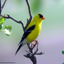

In [36]:
img = bytes(np.array(sample['img']))
img = Image.open(io.BytesIO(img))
# img # to view image
resized_img = img.resize((64,64))
resized_img # smaller image

### Validate image (from `txt2image_dataset.py`)


In [42]:
arr_img = np.array(resized_img, dtype=float)
arr_img.shape

(64, 64, 3)

In [43]:
arr_img.transpose(2, 0, 1).shape

(3, 64, 64)

In [44]:
validated_img = arr_img.transpose(2, 0, 1)

## Embeddings

In [48]:
sample['embeddings']

<HDF5 dataset "embeddings": shape (1024,), type "<f4">

In [56]:
embed = np.array(sample['embeddings'], dtype=float)
print(embed)

[-0.10290982  0.12675285  0.09818752 ... -0.05504847 -0.02622498
 -0.03597182]
